In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [4]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [5]:
# konwersja jedn. imperialnych na metryczne
df.Height *= 2.54
df.Weight /= 2.2
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364


In [6]:
pd.get_dummies(df)

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,109.951620,0,1
1,174.706036,73.777488,0,1
2,188.239668,96.700389,0,1
3,182.196685,100.019305,0,1
4,177.499761,93.795364,0,1
...,...,...,...,...
9995,168.078536,62.171570,1,0
9996,170.350573,77.667230,1,0
9997,162.224700,58.397872,1,0
9998,175.346978,74.478392,1,0


<AxesSubplot:xlabel='Weight', ylabel='Count'>

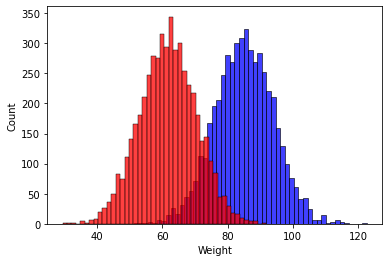

In [10]:
# rozkład zm. zaleznej
sns.histplot(df.query(" Gender=='Male' ").Weight, color="b")
sns.histplot(df.query(" Gender=='Female' ").Weight, color="r")

In [12]:
df = pd.get_dummies(df)
del(df["Gender_Male"])
df.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df.sample(n=5, random_state=0)

,Height,Weight,Gender
9394,164.398647,62.766271,1
898,170.871313,85.165166,0
2398,189.283269,98.424178,0
5906,167.335236,59.891565,1
2343,164.709605,71.690199,0


In [13]:
# 1 - kobieta , 0 - mezczyzna
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
model = LinearRegression()
model.fit( df[ ["Height","Gender"] ] , df.Weight )

LinearRegression()

In [17]:
# predykcja dla mezcz. wzrost 192cm
model.predict([ [192,0], [165,1] ])

array([102.84294991,  65.15562029])

In [18]:
model.coef_, model.intercept_

(array([ 1.06960294, -8.80805024]), -102.52081454490089)

In [20]:
pd.DataFrame(model.coef_, ["Height","Gender"] )

,0
Height,1.069603
Gender,-8.808050


In [21]:
height = 192
gender = 0

model.intercept_ + model.coef_[0]*height + model.coef_[1]*gender

102.84294990633599

In [22]:
r2_score( df.Weight, model.predict(df[ ["Height","Gender"] ]) )

0.9027481729220092

### Predykcja cen nieruchomości

In [23]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


In [24]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


<AxesSubplot:>

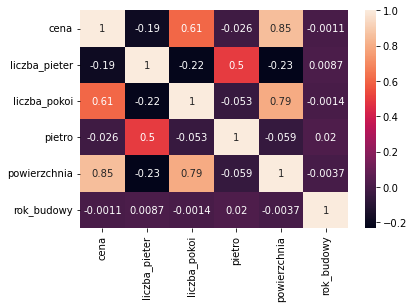

In [27]:
sns.heatmap( df.corr(), annot=True )

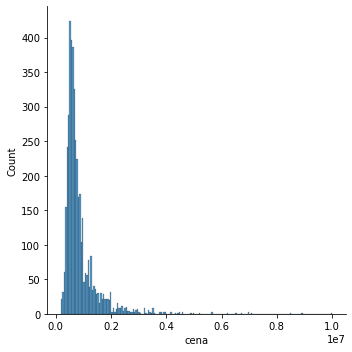

In [28]:
sns.displot(df.cena)

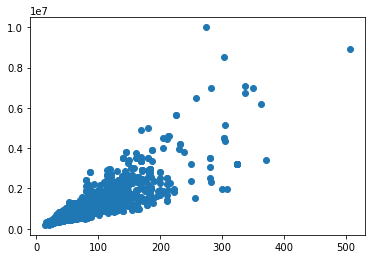

In [31]:
plt.scatter(df.powierzchnia, df.cena)

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


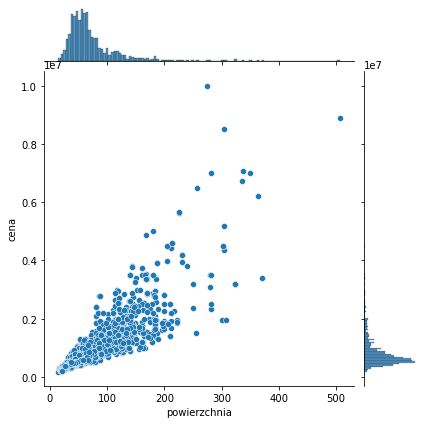

In [36]:
sns.jointplot(df.powierzchnia, df.cena, kind="scatter")

In [44]:
df.describe(percentiles=[x/10 for x in range(1,10)])

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
10%,4.290000e+05,3.000000,2.000000,0.000000,35.850000,1978.000000
20%,4.990000e+05,4.000000,2.000000,1.000000,42.000000,1995.000000
30%,5.519500e+05,5.000000,2.000000,1.000000,48.000000,2001.000000
40%,6.010000e+05,6.000000,2.000000,2.000000,54.066000,2007.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
60%,7.490000e+05,7.000000,3.000000,4.000000,65.290000,2018.000000


In [45]:
min_ = df.describe().loc["min","cena"]
q1_ = df.describe().loc["25%","cena"]
q3_ = df.describe().loc["75%","cena"]
min_, q1_, q3_

(187330.0, 525000.0, 939900.0)

In [46]:
df1 = df.query(f" cena>={min_} and cena<={q3_} ")

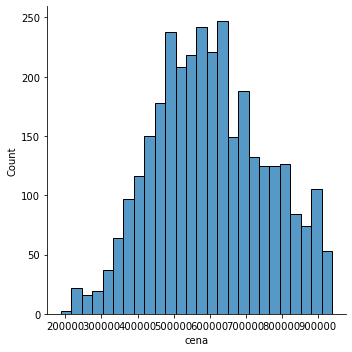

In [47]:
sns.displot(df1.cena)

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X = df1.iloc[ : , 2: ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape, X_test.shape

((2588, 5), (648, 5))

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TEST:", model.score(X_test, y_test) )
print("TRAIN:", model.score(X_train, y_train) )

TEST: 0.6738871746608246
TRAIN: 0.6626635466445601


In [53]:
df1.columns

Index(['id', 'cena', 'liczba_pieter', 'liczba_pokoi', 'pietro', 'powierzchnia',
       'rok_budowy'],
      dtype='object')

In [59]:
# model na 1 cechach
X = df1[ ["powierzchnia"] ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TEST:", model.score(X_test, y_test) )
print("TRAIN:", model.score(X_train, y_train) )

TEST: 0.6657828244531119
TRAIN: 0.6564261873591819


### Analiza zbioru Boston House Pricing

In [60]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [61]:
ds = load_boston()

In [62]:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [63]:
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [66]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["MEDV"] = ds.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [67]:
X = df.iloc[: , :-1]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TEST:", model.score(X_test, y_test) )
print("TRAIN:", model.score(X_train, y_train) )

TEST: 0.6687594935356306
TRAIN: 0.7508856358979672


<AxesSubplot:>

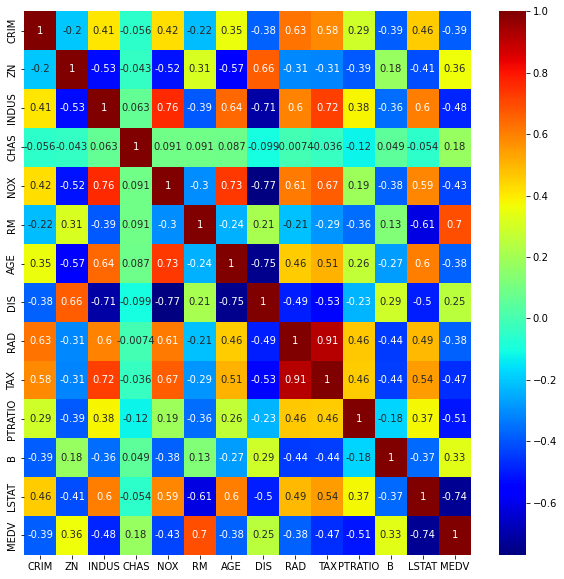

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap( df.corr(), annot=True, cmap='jet' )

In [78]:
best_cols = df.corr().iloc[-1].abs().sort_values(ascending=False)[1:11].index
best_cols

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE',
       'ZN'],
      dtype='object')

<AxesSubplot:>

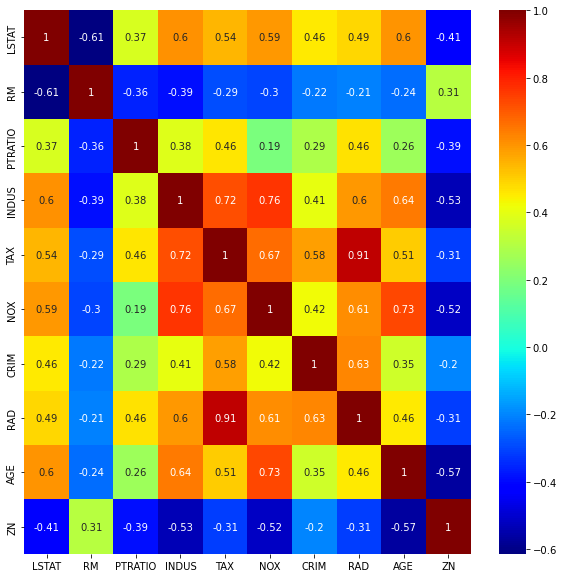

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap( df[best_cols].corr() , annot=True, cmap='jet')

In [82]:
X = df[best_cols]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TEST:", model.score(X_test, y_test) )
print("TRAIN:", model.score(X_train, y_train) )

TEST: 0.6437021254129367
TRAIN: 0.7057145874002422


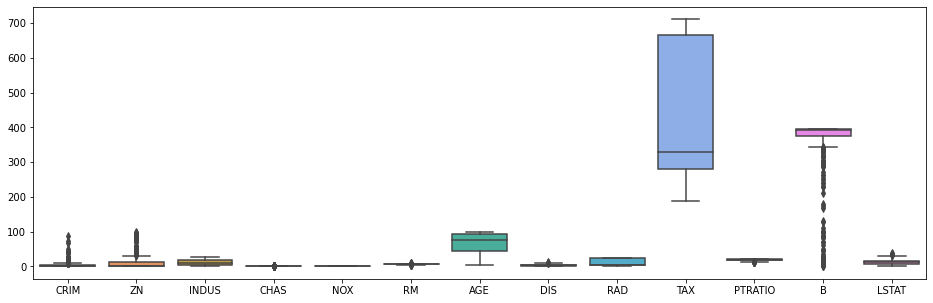

In [85]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df.iloc[:,:-1]);

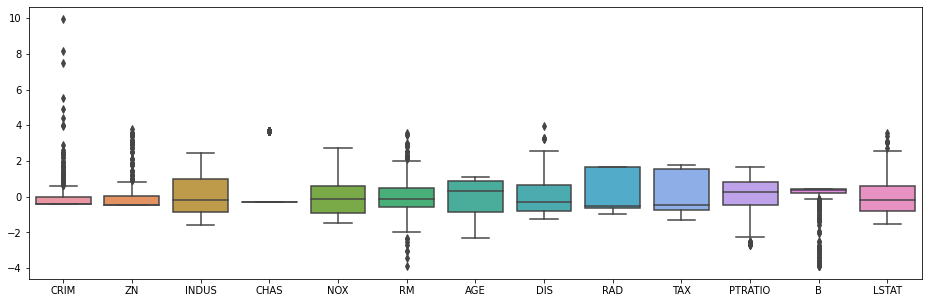

In [88]:
scaler = StandardScaler()
df_tmp = pd.DataFrame( scaler.fit_transform(ds.data), columns=ds.feature_names)
plt.figure(figsize=(16,5))
sns.boxplot(data=df_tmp);

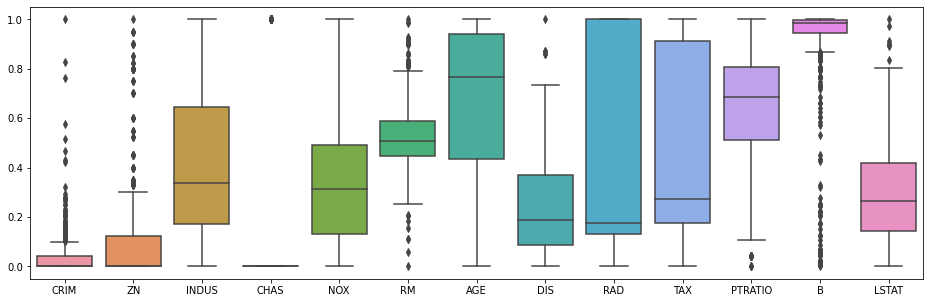

In [89]:
scaler = MinMaxScaler()
df_tmp = pd.DataFrame( scaler.fit_transform(ds.data), columns=ds.feature_names)
plt.figure(figsize=(16,5))
sns.boxplot(data=df_tmp);

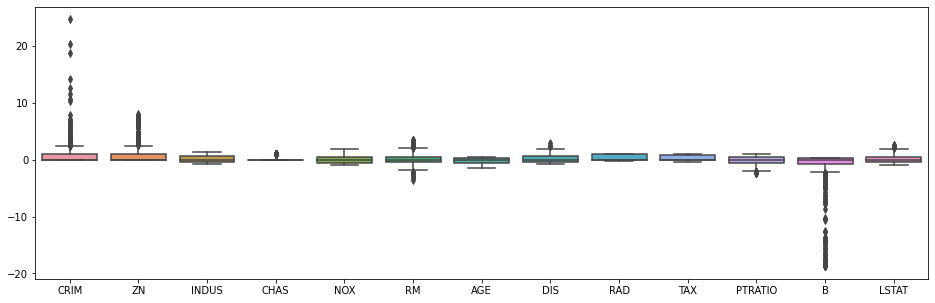

In [90]:
scaler = RobustScaler()
df_tmp = pd.DataFrame( scaler.fit_transform(ds.data), columns=ds.feature_names)
plt.figure(figsize=(16,5))
sns.boxplot(data=df_tmp);

In [91]:
X = df[best_cols]
y = df.MEDV

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TEST:", model.score(X_test, y_test) )
print("TRAIN:", model.score(X_train, y_train) )

TEST: 0.643702125412938
TRAIN: 0.7057145874002424
